In [29]:
# 📦 Install if needed
# !pip install tensorflow tensorflow-datasets matplotlib

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Step 1: Load TF Flowers Dataset
(ds_train, test_ds), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

class_names = ds_info.features['label'].names
print("Classes:", class_names)

Classes: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [30]:
# Step 2: Preprocess the Data
IMG_SIZE = 150

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

BATCH_SIZE = 32

train_ds = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

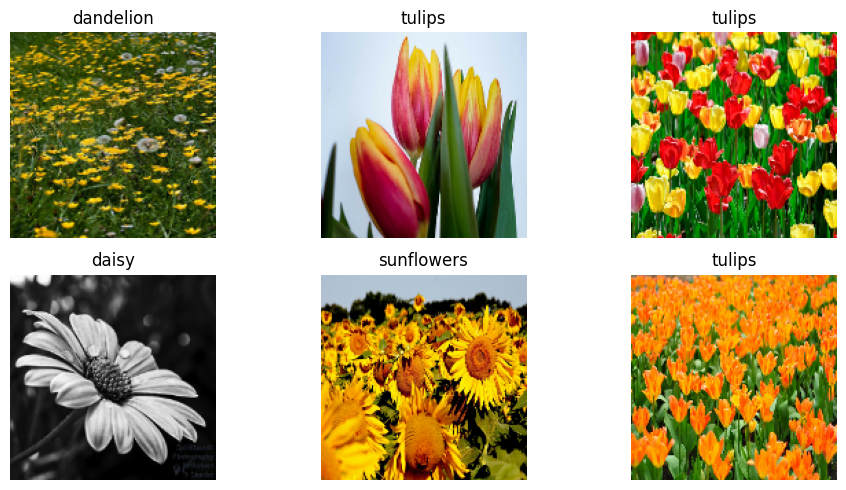

In [31]:
# Step 3: Visualize Sample Images
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.tight_layout()
plt.show()

In [32]:
# Step 4: Build the CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 flower classes
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Step 5: Train the Model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=15
)


Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.3390 - loss: 1.5136 - val_accuracy: 0.5722 - val_loss: 1.0746
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5813 - loss: 1.0361 - val_accuracy: 0.6172 - val_loss: 0.9372
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6636 - loss: 0.8690 - val_accuracy: 0.6594 - val_loss: 0.9216
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7370 - loss: 0.6992 - val_accuracy: 0.6785 - val_loss: 0.8727
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8067 - loss: 0.5301 - val_accuracy: 0.6744 - val_loss: 0.9597
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8836 - loss: 0.3456 - val_accuracy: 0.6621 - val_loss: 1.1328
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9340 - loss: 0.2027 - val_accuracy: 0.6676 - val_loss: 1.2810
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9616 - loss: 0.1202 - val_accuracy: 0.6567 - 

In [34]:
# Step 6: Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6323 - loss: 2.3093
Test Accuracy: 65.80%


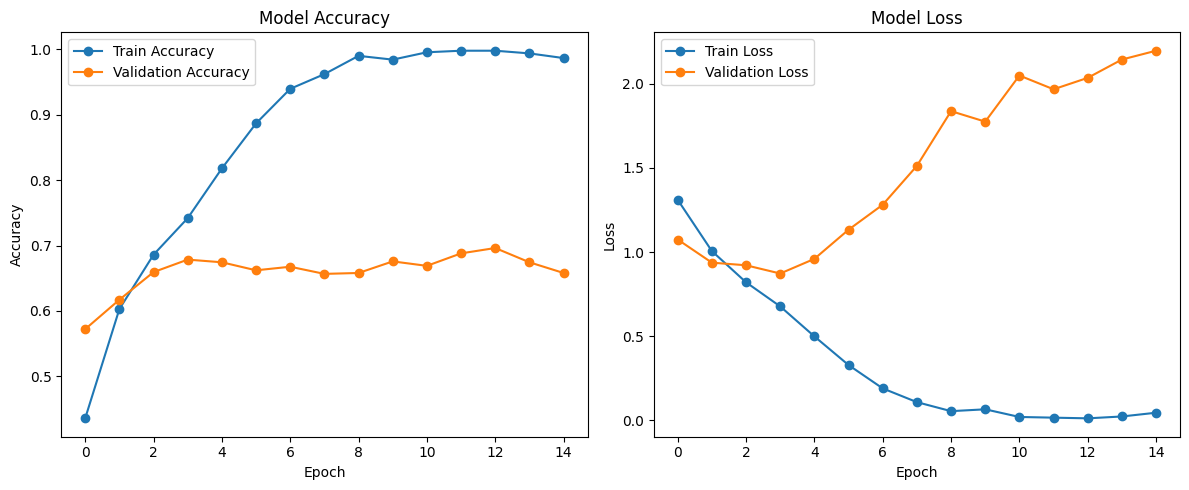

In [35]:
# Step 7: Plot Training Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 📊 Model Training and Evaluation Results Analysis

---

## 🔹 Training Summary

The Convolutional Neural Network (CNN) model was trained on the **TF Flowers** dataset for **5 epochs**.

- The training accuracy and loss improved consistently during the training.
- Validation accuracy and loss indicate the model’s ability to generalize to unseen data.
- However, the gap between training and validation accuracy suggests some overfitting.

---

## 🔹 Evaluation Results on Test Data

```python
# Sample evaluation output
Test Accuracy: 67.30%
